In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
colnames=['Age','Work-Class','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv(f'G:\ineuron\dataset\income-dataset.csv',names=colnames, header=None,na_values=['nan','?'])

In [115]:
data.head()

,Age,Work-Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [116]:
data.shape

(32561, 15)

In [117]:
data.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [118]:
#separating numerical and categorical columns
col = data.columns
num_cols = data._get_numeric_data().columns
categorical_feature = list(set(col) - set(num_cols))

In [119]:
#remove space 
for i in categorical_feature:
    data[i]=data[i].str.strip()

In [120]:
#replacing ? with nan
data.replace('?',np.nan,inplace=True)

In [121]:
#checking null values
data.isnull().sum()

Age                  0
Work-Class        1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital              0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [122]:
data.dropna(axis=0,inplace=True)

In [123]:
#checking null values
data.isnull().sum()

Age               0
Work-Class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital           0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [157]:
#duplicate vales
data.duplicated().sum()

23

In [158]:
data = data.drop_duplicates()

In [159]:
data.head()

,Age,Work-Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
Age               30139 non-null int64
Work-Class        30139 non-null object
fnlwgt            30139 non-null int64
education         30139 non-null object
education-num     30139 non-null int64
marital-status    30139 non-null object
occupation        30139 non-null object
relationship      30139 non-null object
race              30139 non-null object
sex               30139 non-null object
capital           30139 non-null int64
capital-loss      30139 non-null int64
hours-per-week    30139 non-null int64
native-country    30139 non-null object
income            30139 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education-num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital-loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


In [164]:
data.describe(include='object').T

,count,unique,top,freq
Work-Class,30139,7,Private,22264
education,30139,16,HS-grad,9834
marital-status,30139,7,Married-civ-spouse,14059
occupation,30139,14,Prof-specialty,4034
relationship,30139,6,Husband,12457
race,30139,5,White,25912
sex,30139,2,Male,20366
native-country,30139,41,United-States,27487
income,30139,2,<=50K,22633


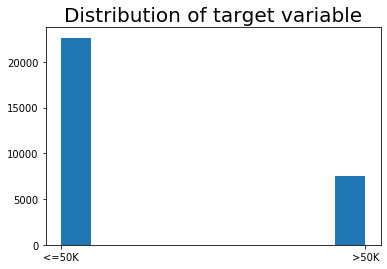

In [165]:
#target variable distribution
plt.hist(data['income'])
plt.title("Distribution of target variable", fontsize=20)
plt.show()

In [166]:
print('Number of occurrences:')
print(data['income'].value_counts())
print('\npercentage values:')
print(data['income'].value_counts(normalize=True))

Number of occurrences:
<=50K    22633
>50K      7506
Name: income, dtype: int64

percentage values:
<=50K    0.750954
>50K     0.249046
Name: income, dtype: float64


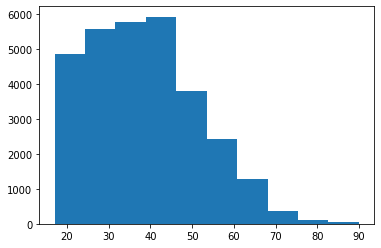

In [167]:
# columns value distribution
plt.hist(data['Age'])
plt.show()

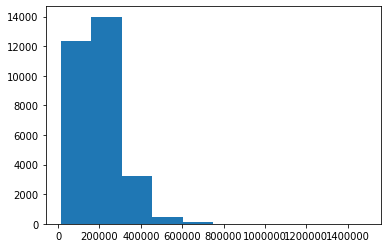

In [168]:
plt.hist(data['fnlwgt'])
plt.show()

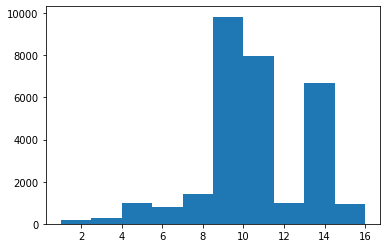

In [169]:
plt.hist(data['education-num'])
plt.show()

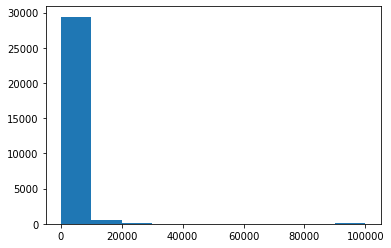

In [170]:
plt.hist(data['capital'])
plt.show()

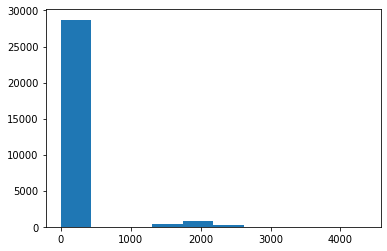

In [171]:
plt.hist(data['capital-loss'])
plt.show()

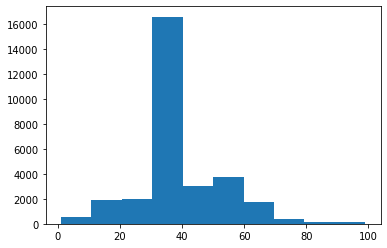

In [172]:
plt.hist(data['hours-per-week'])
plt.show()

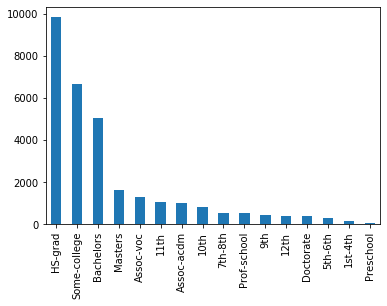

In [173]:
data['education'].value_counts().plot(kind='bar')

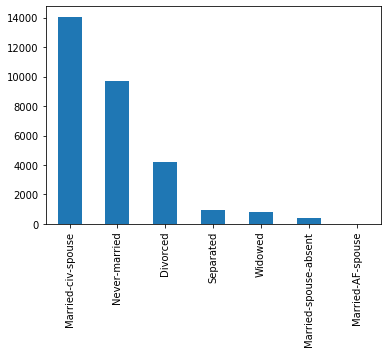

In [174]:
data['marital-status'].value_counts().plot(kind='bar')

In [175]:
data.head()

,Age,Work-Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


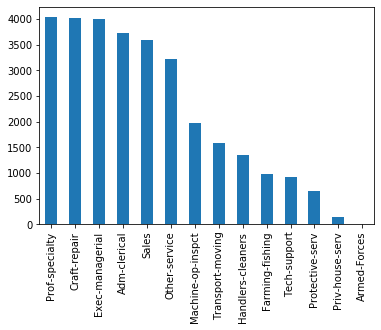

In [176]:
data['occupation'].value_counts().plot(kind='bar')

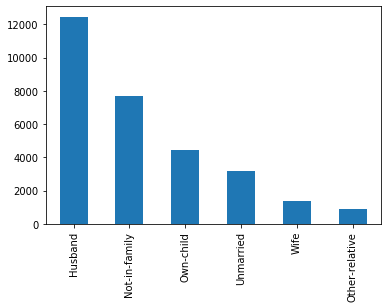

In [177]:
data['relationship'].value_counts().plot(kind='bar')

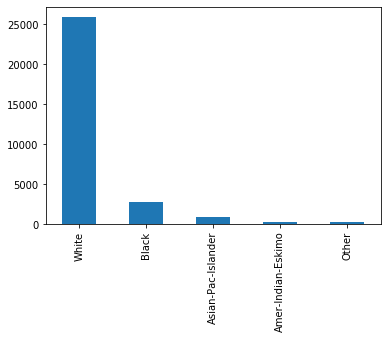

In [178]:
data['race'].value_counts().plot(kind='bar')

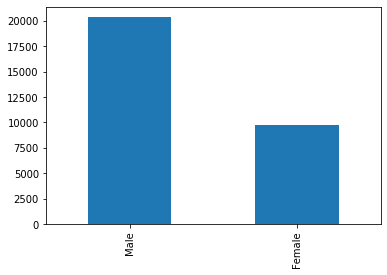

In [179]:
data['sex'].value_counts().plot(kind='bar')

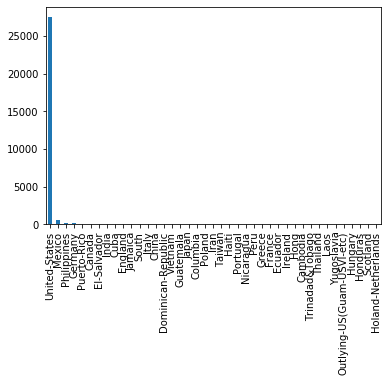

In [180]:
data['native-country'].value_counts().plot(kind='bar')

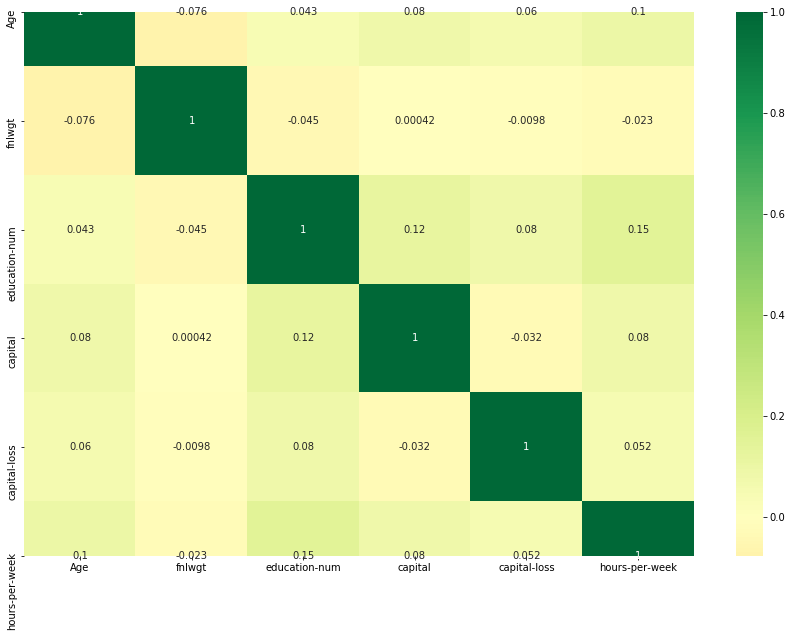

In [181]:
# plot correlation graph of numeric attributes
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn",center=0)
plt.show()


In [182]:
data.corr()

,Age,fnlwgt,education-num,capital,capital-loss,hours-per-week
Age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


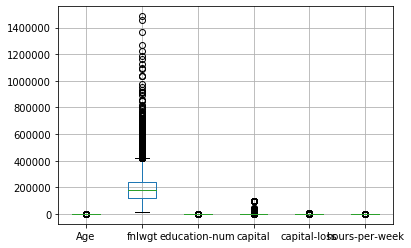

In [183]:
data.boxplot()

## preprocessing

In [184]:
#feature engineering
#encoding
from sklearn import preprocessing

for feature in categorical_feature:
        label = preprocessing.LabelEncoder()
        data[feature] = label.fit_transform(data[feature])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [185]:
#split dataset
x = data.drop('income', axis=1)
y=data['income']

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [187]:
X_train.head()

,Age,Work-Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital,capital-loss,hours-per-week,native-country
473,30,2,303990,11,9,4,13,1,4,1,0,0,60,38
5925,57,4,437281,15,10,2,12,0,4,1,0,0,38,38
7098,32,2,182975,15,10,4,12,1,4,0,0,0,20,38
9692,37,2,330826,8,11,2,9,5,4,0,0,0,30,38
6530,40,2,321758,11,9,2,11,0,4,1,0,0,40,38


## model 

### Bagging classifier

In [197]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [189]:
bagging_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)

In [190]:
bagging_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [192]:
y_pred1 = bagging_clf.predict(X_test)

In [195]:
accuracy_score(y_test, y_pred1)

0.7850033178500332

In [201]:
#confusion matrix
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[6783,    9],
       [1935,  315]], dtype=int64)

In [202]:
print(f1_score(y_test, y_pred1, average="macro"))
print(precision_score(y_test, y_pred1, average="macro"))
print(recall_score(y_test, y_pred1, average="macro"))

0.5597083767296533
0.8751338227422192
0.5693374558303888


### Random Forest classifier

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)

In [204]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [205]:
y_pred2 = model.predict(X_test)

In [206]:
accuracy_score(y_test,y_pred2)

0.7850033178500332

In [208]:
confusion_matrix(y_test, y_pred2)

array([[6783,    9],
       [1935,  315]], dtype=int64)

In [209]:
print(f1_score(y_test, y_pred2, average="macro"))
print(precision_score(y_test, y_pred2, average="macro"))
print(recall_score(y_test, y_pred2, average="macro"))

0.5597083767296533
0.8751338227422192
0.5693374558303888


### voting classifier 

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [215]:
#voting hard
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [217]:
y_pred3 = eclf1.predict(X_test)

In [218]:
accuracy_score(y_test,y_pred3)

0.7990488829904888

In [219]:
confusion_matrix(y_test, y_pred3)

array([[6536,  256],
       [1561,  689]], dtype=int64)

In [220]:
print(f1_score(y_test, y_pred3, average="macro"))
print(precision_score(y_test, y_pred3, average="macro"))
print(recall_score(y_test, y_pred3, average="macro"))

0.6546312509124642
0.7681565384788801
0.6342654102866117


In [224]:
#voting sodft
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf2.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [225]:
y_pred4 = eclf2.predict(X_test)

In [226]:
accuracy_score(y_test,y_pred4)

0.7946250829462508

### ExtraTree classifier 

In [221]:
from sklearn.ensemble import ExtraTreesClassifier

In [222]:
extraTree_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [227]:
extraTree_clf.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [229]:
y_pred5 = extraTree_clf.predict(X_test)

In [230]:
accuracy_score(y_test,y_pred5)

0.8404114134041142

In [231]:
confusion_matrix(y_test, y_pred5)

array([[6177,  615],
       [ 828, 1422]], dtype=int64)

In [233]:
print(f1_score(y_test, y_pred5, average="macro"))
print(precision_score(y_test, y_pred5, average="macro"))
print(recall_score(y_test, y_pred5, average="macro"))

0.7794065129015328
0.7899420674691652
0.770726148409894
